In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')
sys.path.append('../')
from evaluate.eval_utils import get_simple_eval_metrics

# OUTPUT_ROOT = "/sailhome/esui/cs224u_final_project/prontoqa_output/fictional/aggregated"
OUTPUT_ROOT = "../../prontoqa_output/fictional/aggregated"

def get_metrics_dict_for_prompt_type(prompt_type, k, restrict_type='none'):

    filename = 'merge_answer_hard_merge_cot_none_path_select_heaviest'
    if k is not None:
        dir = os.path.join(prompt_type, "summary")
        filename += f"_{k}hop.pkl"
    else:
        dir = prompt_type
        filename += ".pkl"

    path = os.path.join(OUTPUT_ROOT, dir, filename)

    metrics_dict = get_simple_eval_metrics(path, restrict_type=restrict_type)
    return metrics_dict

def get_data_for_all_metrics(metrics_dict, prompt_types):
    data = []
    for metric in metrics_dict[prompt_types[0]].keys():
        data_metric = [metric]
        for prompt_type in prompt_types:
            data_metric.append(metrics_dict[prompt_type][metric])
        data.append(data_metric)
    return data


def get_data_for_single_metric(metric, metrics_dict, prompt_types):
    data = []
    data_metric = []
    for prompt_type in prompt_types:
        data_metric.append(metrics_dict[prompt_type][metric])
    data.append(data_metric)
    return data


def plot_metric(metrics_df, metric, title, save_file):
    metrics_df = metrics_df[metrics_df['metric'] == metric]
    metrics_df = metrics_df.drop(columns=['metric']).T

    # Rename the metrics
    mapping = {
        'avg_label_acc': "Average Label Accuracy",
        "avg_cot_acc": "Average CoT Accuracy",
        "avg_cot_precision": "Average CoT Precision",
        "avg_cot_recall": "Average CoT Recall",
        "avg_cot_f1": "Average CoT F1"
    }

    metric = mapping[metric]

    metrics_df = metrics_df.rename(columns={0:metric})
    metrics_df = metrics_df.reset_index().rename(columns={'index':'Prompting Strategy'})

    # Rename the aggregation types
    mapping = {
        'single_baseline':'Baseline', 
        'single_forward': "Forward Chaining",
        'single_backward': "Backward Chaining",
        'single_baseline_neg': "Baseline Negate All Queries",
        'single_forward_neg': "Forward Negate All Queries",
        'single_backward_neg': "Backward Negate All Queries",
        'double_baseline_negation': "Baseline Negate 'not' Queries",
        'double_forward_negation': "Forward Negate 'not' Queries",
        'double_backward_negation': "Backward Negate 'not' Queries",
    }
    metrics_df['Prompting Strategy'] = metrics_df['Prompting Strategy'].map(mapping)

    print(metrics_df)
    kind='barh'
    ax = metrics_df.plot(
        x='Prompting Strategy',
        xlabel=metric,
        kind=kind,
        stacked=False,
        title=title,
        legend=False,
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
    
    plt.savefig(save_file, bbox_inches='tight')

In [ ]:
# PROMPT_TYPES = ["single_baseline", "single_baseline_neg", "double_baseline_negation", "single_forward", "single_forward_neg", "double_forward_negation", "single_backward", "single_backward_neg", "double_backward_negation"]
# columns = ["metric"] + PROMPT_TYPES
# metrics_dict = {}

# for metric in ['avg_label_acc', 'avg_cot_acc']:
#     for restrict_type in ['none', 'not_only', 'no_not_only']:
#         if restrict_type == 'none':
#             dataset_type = 'all'
#         else:
#             dataset_type = restrict_type

#         for k in [1, 3, 5, None]:
#             for prompt_type in PROMPT_TYPES:
#                 metrics_dict[prompt_type] = get_metrics_dict_for_prompt_type(prompt_type, k, restrict_type)

#             data = get_data_for_all_metrics(metrics_dict, PROMPT_TYPES)

#             metrics_df = pd.DataFrame(
#                         columns=columns,
#                         data=data,
#             )

#             # print(metrics_df)

#             # metrics_df.plot(x='metric',
#             #     kind='barh',
#             #     stacked=False,
#             #     title="individual eval no path selection"
#             # )

#             # save to csv
#             # dir = '/sailhome/esui/cs224u_final_project/evaluate/results/single_with_path_selection'
#             dir = '../../evaluate/results/single_with_path_selection'
#             os.makedirs(dir, exist_ok=True)

#             if k is not None:
#                 save_path = os.path.join(dir, f'{dataset_type}_path_selection_none_{k}hop.csv')
#             else:
#                 save_path = os.path.join(dir, f'{dataset_type}_path_selection_none_all.csv')
            
#             metrics_df.T.to_csv(save_path)

#             dir = os.path.join(dir, "plots")
#             os.makedirs(dir, exist_ok=True)
#             plot_metric(metrics_df, metric, title=None, save_file=os.path.join(dir, f'{metric}_{dataset_type}_path_selection_heaviest_{k}hop.pdf'))

                              Full Dataset  Only 'not' queries  \
Baseline                          0.916667            0.888158   
Forward Chaining                  0.903333            0.881579   
Forward Negate 'not' Queries      0.946667            0.967105   

                              No 'not' queries  
Baseline                              0.945946  
Forward Chaining                      0.925676  
Forward Negate 'not' Queries          0.925676  


RuntimeError: No active exception to reraise

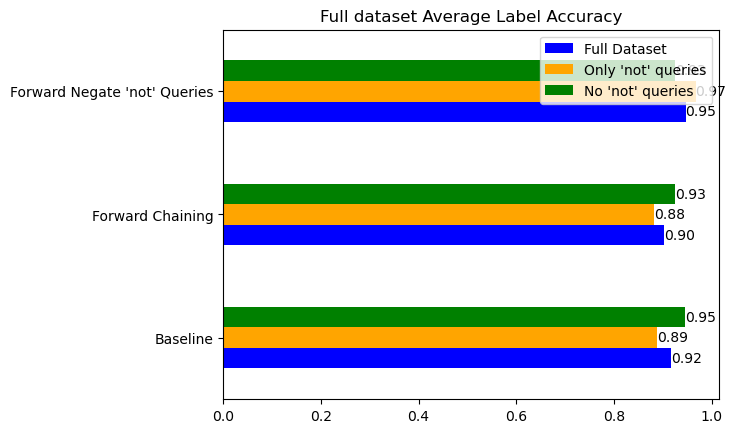

In [43]:
PROMPT_TYPES = ["single_baseline", "single_forward", "double_forward_negation"]
pt_mapping = {
        'single_baseline':'Baseline', 
        'single_forward': "Forward Chaining",
        'single_backward': "Backward Chaining",
        'single_baseline_neg': "Baseline Negate All Queries",
        'single_forward_neg': "Forward Negate All Queries",
        'single_backward_neg': "Backward Negate All Queries",
        'double_baseline_negation': "Baseline Negate 'not' Queries",
        'double_forward_negation': "Forward Negate 'not' Queries",
        'double_backward_negation': "Backward Negate 'not' Queries",
    }
label_mapping = {
        'avg_label_acc': "Average Label Accuracy",
        "avg_cot_acc": "Average CoT Accuracy",
        "avg_cot_precision": "Average CoT Precision",
        "avg_cot_recall": "Average CoT Recall",
        "avg_cot_f1": "Average CoT F1"
    }
metrics_dict = {}

metric = 'avg_label_acc' # 'avg_cot_acc'
k = None # 1,3,5,None
columns = [pt_mapping[p] for p in PROMPT_TYPES]

# No restriction
restrict_type = 'none'
dataset_type = "all"

for prompt_type in PROMPT_TYPES:
    metrics_dict[prompt_type] = get_metrics_dict_for_prompt_type(prompt_type, k, restrict_type)

data = get_data_for_single_metric(metric, metrics_dict, PROMPT_TYPES)

metrics_df = pd.DataFrame(
            columns=columns,
            data=data,
)
metrics_df.index = ["Full Dataset"]

metrics_df = metrics_df.T

# not_only
restrict_type = 'not_only'
dataset_type = "not_only"

for prompt_type in PROMPT_TYPES:
    metrics_dict[prompt_type] = get_metrics_dict_for_prompt_type(prompt_type, k, restrict_type)

data = get_data_for_single_metric(metric, metrics_dict, PROMPT_TYPES)

df1 = pd.DataFrame(
            columns=columns,
            data=data,
)
df1.index = ["Only 'not' queries"]

df1 = df1.T

# no_not_only
restrict_type = 'no_not_only'
dataset_type = "no_not_only"

for prompt_type in PROMPT_TYPES:
    metrics_dict[prompt_type] = get_metrics_dict_for_prompt_type(prompt_type, k, restrict_type)

data = get_data_for_single_metric(metric, metrics_dict, PROMPT_TYPES)

df2 = pd.DataFrame(
            columns=columns,
            data=data,
)
df2.index = ["No 'not' queries"]

df2 = df2.T

metrics_df = pd.concat([metrics_df, df1, df2], axis=1)
print(metrics_df)

if k:
    title = f"{k}-hop {label_mapping[metric]}"
else:
    title = f"Full dataset {label_mapping[metric]}"
ax = metrics_df.plot.barh(title=title, color=("blue", "orange", "green"))
for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')
raise

dir = os.path.join(dir, "plots")
os.makedirs(dir, exist_ok=True)
plot_metric(metrics_df, metric, title=None, save_file=os.path.join(dir, f'{metric}_{dataset_type}_path_selection_heaviest_{k}hop.pdf'))